In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import scipy.stats as stats
import plotly.graph_objects as go


In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv("/home/ashwin/Desktop/Projects/UFC-Data-Analysis//UFC.csv")

In [4]:
df.head(5)

,event_name,date,location,division,title_fight,method,finish_round,match_time_sec,total_rounds,referee,fighter,r_kd,r_sig_str_landed,r_sig_str_atmpted,r_sig_str_acc,r_total_str_landed,r_total_str_atmpted,r_total_str_acc,r_td_landed,r_td_atmpted,r_td_acc,r_sub_att,r_ctrl,r_head_landed,r_head_atmpted,r_head_acc,r_body_landed,r_body_atmpted,r_body_acc,r_leg_landed,r_leg_atmpted,r_leg_acc,r_dist_landed,r_dist_atmpted,r_dist_acc,r_clinch_landed,r_clinch_atmpted,r_clinch_acc,r_ground_landed,r_ground_atmpted,r_ground_acc,r_landed_head_per,r_landed_body_per,r_landed_leg_per,r_landed_dist_per,r_landed_clinch_per,r_landed_ground_per,r_nick_name,r_wins,r_losses,r_draws,r_height,r_weight,r_reach,r_stance,r_dob,r_splm,r_str_acc,r_sapm,r_str_def,r_td_avg,r_td_avg_acc,r_td_def,r_sub_avg,b_name,b_id,b_kd,b_sig_str_landed,b_sig_str_atmpted,b_sig_str_acc,b_total_str_landed,b_total_str_atmpted,b_total_str_acc,b_td_landed,b_td_atmpted,b_td_acc,b_sub_att,b_ctrl,b_head_landed,b_head_atmpted,b_head_acc,b_body_landed,b_body_atmpted,b_body_acc,b_leg_landed,b_leg_atmpted,b_leg_acc,b_dist_landed,b_dist_atmpted,b_dist_acc,b_clinch_landed,b_clinch_atmpted,b_clinch_acc,b_ground_landed,b_ground_atmpted,b_ground_acc,b_landed_head_per,b_landed_body_per,b_landed_leg_per,b_landed_dist_per,b_landed_clinch_per,b_landed_ground_per,b_nick_name,b_wins,b_losses,b_draws,b_height,b_weight,b_reach,b_stance,b_dob,b_splm,b_str_acc,b_sapm,b_str_def,b_td_avg,b_td_avg_acc,b_td_def,b_sub_avg,winner
0,UFC Fight Night: Hill vs. Rountree Jr.,21-06-25,"Baku, Azerbaijan",catch weight,0,Submission,1,275,3.0,Rich Mitchell,Tofiq Musayev,0.0,2.0,6.0,33.0,17.0,23.0,74.0,0.0,0.0,NaN,0.0,12.0,0.0,4.0,0.0,2.0,2.0,100.0,0.0,0.0,NaN,2.0,6.0,33.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,100.0,0.0,100.0,0.0,0.0,NaN,22,6,0,175.26,70.31,175.26,Orthodox,15-12-89,0.44,33,0.44,71,0.00,0,40,0.0,Myktybek Orolbai,bf2c8e01b07d3eb1,0.0,2.0,7.0,28.0,15.0,25.0,60.0,3.0,5.0,60.0,1.0,220.0,2.0,7.0,28.0,0.0,0.0,NaN,0.0,0.0,NaN,1.0,4.0,25.0,0.0,0.0,NaN,1.0,3.0,33.0,100.0,0.0,0.0,50.0,0.0,50.0,NaN,14,2,1,177.80,70.31,187.96,Orthodox,10-02-98,3.11,48,3.08,50,5.82,45,40,0.7,Myktybek Orolbai
1,UFC Fight Night: Hill vs. Rountree Jr.,21-06-25,"Baku, Azerbaijan",lightweight,0,Decision - Unanimous,3,300,3.0,Marc Goddard,Rafael Fiziev,0.0,62.0,113.0,54.0,87.0,141.0,62.0,4.0,4.0,100.0,0.0,103.0,31.0,72.0,43.0,25.0,34.0,74.0,6.0,7.0,86.0,52.0,96.0,54.0,5.0,7.0,71.0,5.0,10.0,50.0,50.0,40.0,9.0,83.0,8.0,8.0,Ataman,13,4,0,172.72,70.31,180.34,Switch,05-03-93,4.77,52,4.77,50,0.89,72,90,0.0,Ignacio Bahamondes,e4a47b07044ddd72,0.0,50.0,147.0,34.0,62.0,165.0,38.0,0.0,2.0,0.0,0.0,73.0,23.0,108.0,21.0,13.0,17.0,76.0,14.0,22.0,64.0,47.0,139.0,34.0,3.0,8.0,38.0,0.0,0.0,NaN,46.0,26.0,28.0,94.0,6.0,0.0,La Jaula,17,6,0,190.50,70.31,190.50,Orthodox,27-08-97,6.55,45,4.33,56,0.00,0,75,0.4,Rafael Fiziev
2,UFC Fight Night: Hill vs. Rountree Jr.,21-06-25,"Baku, Azerbaijan",lightweight,0,KO/TKO,2,257,3.0,Lukasz Bosacki,Nazim Sadykhov,1.0,93.0,150.0,62.0,102.0,161.0,63.0,0.0,1.0,0.0,0.0,89.0,60.0,114.0,53.0,25.0,27.0,93.0,8.0,9.0,89.0,58.0,109.0,53.0,33.0,38.0,87.0,2.0,3.0,67.0,64.0,26.0,8.0,62.0,35.0,2.0,Black Wolf,11,1,1,177.80,70.31,175.26,Southpaw,16-05-94,5.55,50,5.89,50,1.29,55,75,0.3,Nikolas Motta,37f560436d745c18,1.0,66.0,157.0,42.0,76.0,168.0,45.0,0.0,0.0,NaN,0.0,16.0,46.0,136.0,34.0,16.0,16.0,100.0,4.0,5.0,80.0,54.0,135.0,40.0,12.0,22.0,55.0,0.0,0.0,NaN,69.0,24.0,6.0,81.0,18.0,0.0,Iron,15,6,0,175.26,70.31,177.80,Orthodox,08-02-93,4.13,38,5.28,52,0.00,0,83,0.0,Nazim Sadykhov
3,UFC Fight Night: Hill vs. Rountree Jr.,21-06-25,"Baku, Azerbaijan",welterweight,0,Decision - Unanimous,3,300,3.0,Herb Dean,Seokhyeon Ko,0.0,33.0,61.0,54.0,80.0,127.0,63.0,6.0,9.0,66.0,1.0,615.0,25.0,51.0,49.0,5.0,6.0,83.0,3.0,4.0,75.0,14.0,32.0,44.0,3.0,6.0,50.0,16.0,23.0,70.0,75.0,15.0,9.0,42.0,9.0,48.0,The Korean Tyson,12,2,0,177.80,77.11,180.34,Southpaw,24-09-93,2.90,52,2.00,59,4.00,53,75,0.5,Oban Elliott,6b56e94a59b7b134,0.0,10.0,31.0,32.0,19.0,40.0,47.0,0.0,2.0,0.0,0.

In [5]:
df.tail()

,event_name,date,location,division,title_fight,method,finish_round,match_time_sec,total_rounds,referee,fighter,r_kd,r_sig_str_landed,r_sig_str_atmpted,r_sig_str_acc,r_total_str_landed,r_total_str_atmpted,r_total_str_acc,r_td_landed,r_td_atmpted,r_td_acc,r_sub_att,r_ctrl,r_head_landed,r_head_atmpted,r_head_acc,r_body_landed,r_body_atmpted,r_body_acc,r_leg_landed,r_leg_atmpted,r_leg_acc,r_dist_landed,r_dist_atmpted,r_dist_acc,r_clinch_landed,r_clinch_atmpted,r_clinch_acc,r_ground_landed,r_ground_atmpted,r_ground_acc,r_landed_head_per,r_landed_body_per,r_landed_leg_per,r_landed_dist_per,r_landed_clinch_per,r_landed_ground_per,r_nick_name,r_wins,r_losses,r_draws,r_height,r_weight,r_reach,r_stance,r_dob,r_splm,r_str_acc,r_sapm,r_str_def,r_td_avg,r_td_avg_acc,r_td_def,r_sub_avg,b_name,b_id,b_kd,b_sig_str_landed,b_sig_str_atmpted,b_sig_str_acc,b_total_str_landed,b_total_str_atmpted,b_total_str_acc,b_td_landed,b_td_atmpted,b_td_acc,b_sub_att,b_ctrl,b_head_landed,b_head_atmpted,b_head_acc,b_body_landed,b_body_atmpted,b_body_acc,b_leg_landed,b_leg_atmpted,b_leg_acc,b_dist_landed,b_dist_atmpted,b_dist_acc,b_clinch_landed,b_clinch_atmpted,b_clinch_acc,b_ground_landed,b_ground_atmpted,b_ground_acc,b_landed_head_per,b_landed_body_per,b_landed_leg_per,b_landed_dist_per,b_landed_clinch_per,b_landed_ground_per,b_nick_name,b_wins,b_losses,b_draws,b_height,b_weight,b_reach,b_stance,b_dob,b_splm,b_str_acc,b_sapm,b_str_def,b_td_avg,b_td_avg_acc,b_td_def,b_sub_avg,winner
8245,UFC 5: The Return of the Beast,07-04-95,"Charlotte, North Carolina, USA",open weight,0,Submission,1,143,1.0,John McCarthy,Oleg Taktarov,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,1.0,0.0,1.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,33.0,34.0,33.0,33.0,34.0,33.0,The Russian Bear,17,5,2,182.88,95.25,NaN,Orthodox,26-08-67,0.0,0,0.00,0,0.00,0,0,0.0,Ernie Verdicia,2b1587a3376ab743,0.0,2.0,5.0,40.0,7.0,11.0,64.0,0.0,0.0,NaN,0.0,NaN,2.0,5.0,40.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,2.0,0.0,0.0,0.0,NaN,2.0,3.0,67.0,100.0,0.0,0.0,0.0,0.0,100.0,NaN,0,1,0,180.34,90.26,NaN,Orthodox,NaN,0.0,0,0.0,0,0.0,0,0,0.0,Oleg Taktarov
8246,UFC 5: The Return of the Beast,07-04-95,"Charlotte, North Carolina, USA",open weight,0,KO/TKO,1,122,1.0,John McCarthy,Guy Mezger,1.0,12.0,17.0,70.0,15.0,20.0,75.0,0.0,0.0,NaN,0.0,NaN,10.0,15.0,67.0,1.0,1.0,100.0,1.0,1.0,100.0,2.0,5.0,40.0,2.0,2.0,100.0,8.0,10.0,80.0,83.0,8.0,8.0,16.0,16.0,66.0,NaN,30,14,2,185.42,90.72,NaN,Orthodox,01-01-68,2.3,32,1.36,72,0.39,50,88,0.0,John Dowdy,e780ccc79a209985,0.0,0.0,4.0,0.0,2.0,7.0,28.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,2.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0,0.0,0,0,0.0,Guy Mezger
8247,UFC 5: The Return of the Beast,07-04-95,"Charlotte, North Carolina, USA",open weight,0,KO/TKO,1,83,1.0,John McCarthy,Jon Hess,0.0,17.0,28.0,60.0,30.0,41.0,73.0,0.0,0.0,NaN,0.0,NaN,7.0,17.0,41.0,10.0,11.0,91.0,0.0,0.0,NaN,6.0,14.0,43.0,6.0,9.0,67.0,5.0,5.0,100.0,41.0,58.0,0.0,35.0,35.0,29.0,NaN,1,1,0,200.66,133.81,NaN,NaN,NaN,0.0,0,0.00,0,0.00,0,0,0.0,Andy Anderson,9199e0735b83dd32,0.0,2.0,2.0,100.0,6.0,6.0,100.0,0.0,2.0,0.0,0.0,NaN,2.0,2.0,100.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,2.0,2.0,100.0,100.0,0.0,0.0,0.0,0.0,100.0,The Hammer,0,1,0,167.64,108.86,NaN,NaN,16-07-74,0.0,0,0.0,0,0.0,0,0,0.0,Jon Hess
8248,UFC 5: The Return of the Beast,07-04-95,"Charlotte, North Carolina, USA",open weight,0,Submission,1,98,1.0,John McCarthy,Dan Severn,0.0,2.0,4.0,50.0,12.0,19.0,63.0,1.0,1.0,100.0,1.0,NaN,2.0,4.0,50.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,2.0,4.0,50.0,100.0,0.0,0.0,0.0,0.0,100.0,The Beast,101,19,1,187.96,113.40,NaN,Southpaw,08-06-58,0.0,0,0.00,0,0.00,0,0,0.0,Joe Charles,19ffeb5e3fffd6d5,0.0,1.0,1.0,100.0,1.0,2.0,50.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,1.0,1.0,100.0,0.0,0.0,NaN,1.0,1.0,100.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,100.0,0.0,100.0,0.0,0.0,The Ghetto Man,6,13,0,185.42,117.93,NaN,Southpaw,NaN,0.0,0,0.0,0,0.0,0,0,0.0,Dan Severn


In [6]:
df.describe()

,title_fight,finish_round,match_time_sec,total_rounds,r_kd,r_sig_str_landed,r_sig_str_atmpted,r_sig_str_acc,r_total_str_landed,r_total_str_atmpted,r_total_str_acc,r_td_landed,r_td_atmpted,r_td_acc,r_sub_att,r_ctrl,r_head_landed,r_head_atmpted,r_head_acc,r_body_landed,r_body_atmpted,r_body_acc,r_leg_landed,r_leg_atmpted,r_leg_acc,r_dist_landed,r_dist_atmpted,r_dist_acc,r_clinch_landed,r_clinch_atmpted,r_clinch_acc,r_ground_landed,r_ground_atmpted,r_ground_acc,r_landed_head_per,r_landed_body_per,r_landed_leg_per,r_landed_dist_per,r_landed_clinch_per,r_landed_ground_per,r_wins,r_losses,r_draws,r_height,r_weight,r_reach,r_splm,r_str_acc,r_sapm,r_str_def,r_td_avg,r_td_avg_acc,r_td_def,r_sub_avg,b_kd,b_sig_str_landed,b_sig_str_atmpted,b_sig_str_acc,b_total_str_landed,b_total_str_atmpted,b_total_str_acc,b_td_landed,b_td_atmpted,b_td_acc,b_sub_att,b_ctrl,b_head_landed,b_head_atmpted,b_head_acc,b_body_landed,b_body_atmpted,b_body_acc,b_leg_landed,b_leg_atmpted,b_leg_acc,b_dist_landed,b_dist_atmpted,b_dist_acc,b_clinch_landed,b_clinch_atmpted,b_clinch_acc,b_ground_landed,b_ground_atmpted,b_ground_acc,b_landed_head_per,b_landed_body_per,b_landed_leg_per,b_landed_dist_per,b_landed_clinch_per,b_landed_ground_per,b_wins,b_losses,b_draws,b_height,b_weight,b_reach,b_splm,b_str_acc,b_sapm,b_str_def,b_td_avg,b_td_avg_acc,b_td_def,b_sub_avg
count,8250.000000,8250.000000,8250.000000,8219.000000,8229.000000,8229.000000,8229.000000,8191.000000,8229.000000,8229.000000,8202.000000,8229.000000,8229.000000,5592.000000,8229.000000,8048.000000,8229.000000,8229.000000,8151.000000,8229.000000,8229.000000,7399.000000,8229.000000,8229.000000,6682.000000,8229.000000,8229.000000,8111.000000,8229.000000,8229.000000,6273.000000,8229.000000,8229.000000,5334.000000,8229.000000,8229.000000,8229.000000,8229.000000,8229.000000,8229.000000,8250.000000,8250.000000,8250.000000,8245.000000,8247.000000,7830.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8229.000000,8229.000000,8229.000000,8172.000000,8229.000000,8229.000000,8193.000000,8229.000000,8229.000000,5161.000000,8229.000000,8048.000000,8229.000000,8229.000000,8094.000000,8229.000000,8229.000000,7260.000000,8229.000000,8229.000000,6697.000000,8229.000000,8229.000000,8122.000000,8229.000000,8229.000000,6235.000000,8229.000000,8229.000000,4480.000000,8229.000000,8229.000000,8229.000000,8229.000000,8229.000000,8229.00000,8250.000000,8250.000000,8250.000000,8229.000000,8231.000000,7349.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000
mean,0.055152,2.353576,227.964727,3.135296,0.243894,39.109612,84.972901,47.858503,58.886377,107.622554,55.653011,1.211569,2.954672,44.654506,0.438935,154.163892,24.833637,65.826346,39.563980,8.056994,11.476364,70.528179,6.218982,7.670191,81.498653,27.909710,68.898651,40.465171,5.202090,7.389355,69.014507,5.997813,8.684895,70.618485,62.411715,19.899259,16.614048,65.164297,14.008993,19.903269,19.218545,8.040485,0.241576,178.522722,76.173736,183.092802,3.459688,44.434788,3.330848,54.090303,1.571810,38.290545,60.705697,0.620412,0.182404,34.555961,79.954186,43.670215,50.812614,98.588164,51.950812,0.907644,2.690849,36.132532,0.320087,113.840084,21.552437,62.153482,34.408574,7.163325,10.489488,67.889807,5.840199,7.311216,79.817978,26.081905,67.597764,37.896823,4.710900,6.851744,66.849078,3.763155,5.504679,68.733259,58.027464,19.985782,18.170616,69.010329,14.661320,12.69328,17.255636,7.491758,0.253455,178.457147,75.997963,182.679883,3.326410,43.328364,3.500528,52.103758,1.454869,35.760485,57.022303,0.583515
std,0.228290,1.016986,97.419347,0.650322,0.516088,33.090728,71.478572,16.067003,45.932867,79.769716,17.126528,1.807208,3.758479,36.894365,0.878812,191.247961,23.068490,58.039834,17.790114,8.995720,12.365124,24.598654,8.092286,9.903870,23.317603,30.072736,69.088003,16.886624,7.685297,10.399509,27.323114,9.851708,14.279844,26.085993,22.596127,15.799752,17.588377,29.745338,17.602845,26.61

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Columns: 120 entries, event_name to winner
dtypes: float64(87), int64(17), object(16)
memory usage: 7.6+ MB


In [8]:
df.columns

Index(['event_name', 'date', 'location', 'division', 'title_fight', 'method',
       'finish_round', 'match_time_sec', 'total_rounds', 'referee',
       ...
       'b_dob', 'b_splm', 'b_str_acc', 'b_sapm', 'b_str_def', 'b_td_avg',
       'b_td_avg_acc', 'b_td_def', 'b_sub_avg', 'winner'],
      dtype='object', length=120)

In [9]:
df.isnull().sum()

event_name                0
date                      0
location                  0
division                  0
title_fight               0
method                    0
finish_round              0
match_time_sec            0
total_rounds             31
referee                  26
fighter                   0
r_kd                     21
r_sig_str_landed         21
r_sig_str_atmpted        21
r_sig_str_acc            59
r_total_str_landed       21
r_total_str_atmpted      21
r_total_str_acc          48
r_td_landed              21
r_td_atmpted             21
r_td_acc               2658
r_sub_att                21
r_ctrl                  202
r_head_landed            21
r_head_atmpted           21
r_head_acc               99
r_body_landed            21
r_body_atmpted           21
r_body_acc              851
r_leg_landed             21
r_leg_atmpted            21
r_leg_acc              1568
r_dist_landed            21
r_dist_atmpted           21
r_dist_acc              139
r_clinch_landed     

In [10]:
df.shape

(8250, 120)

##**1.Delete unnecessary columns:**

###r_nick_name

###b_nick_name


In [11]:
df.drop(columns=['r_nick_name', 'r_nick_name'], inplace=True)

#**2.Solve null problems**
(best solution don't delete null values)

In [12]:
df.isnull().sum()

event_name                0
date                      0
location                  0
division                  0
title_fight               0
method                    0
finish_round              0
match_time_sec            0
total_rounds             31
referee                  26
fighter                   0
r_kd                     21
r_sig_str_landed         21
r_sig_str_atmpted        21
r_sig_str_acc            59
r_total_str_landed       21
r_total_str_atmpted      21
r_total_str_acc          48
r_td_landed              21
r_td_atmpted             21
r_td_acc               2658
r_sub_att                21
r_ctrl                  202
r_head_landed            21
r_head_atmpted           21
r_head_acc               99
r_body_landed            21
r_body_atmpted           21
r_body_acc              851
r_leg_landed             21
r_leg_atmpted            21
r_leg_acc              1568
r_dist_landed            21
r_dist_atmpted           21
r_dist_acc              139
r_clinch_landed     

##3.Convert date column to datetime and create year column

In [13]:
type(df.date)

pandas.core.series.Series

In [14]:
df['date'] = pd.to_datetime(df['date'], format="%d-%m-%y", errors="coerce")
df['year'] = df['date'].dt.year

#4.	Find top 5 winner

   4.1 Find top 5 winner by years


In [15]:
top_5_fighter = df.groupby('winner').size().reset_index(name='count').nlargest(5, 'count')
top_5_fighter

,winner,count
793,Jim Miller,27
97,Andrei Arlovski,23
273,Charles Oliveira,23
469,Donald Cerrone,23
437,Demian Maia,22


In [16]:
fig = px.bar(
    x=top_5_fighter['winner'],
    y=top_5_fighter['count'],
    title='Top 5 winners',
    color=top_5_fighter['count'],
    color_continuous_scale='viridis'
)

fig.update_layout(showlegend=False)
fig.show()

In [17]:


top_5_fighter_y = df.groupby(['year', 'winner']).size().reset_index(name='count')

top_5_fighter_y_sorted = top_5_fighter_y.sort_values(['year', 'count'], ascending=[True, False])

top_5_fighter_y_top5 = top_5_fighter_y_sorted.groupby('year').head(5)

top_5_fighter_y_top5


,year,winner,count
13,1994,Royce Gracie,8
11,1994,Patrick Smith,3
0,1994,Dan Severn,2
6,1994,Johnny Rhodes,2
7,1994,Keith Hackney,2
17,1995,Dan Severn,6
27,1995,Oleg Taktarov,6
25,1995,Marco Ruas,4
19,1995,David Abbott,3
30,1995,Paul Varelans,3


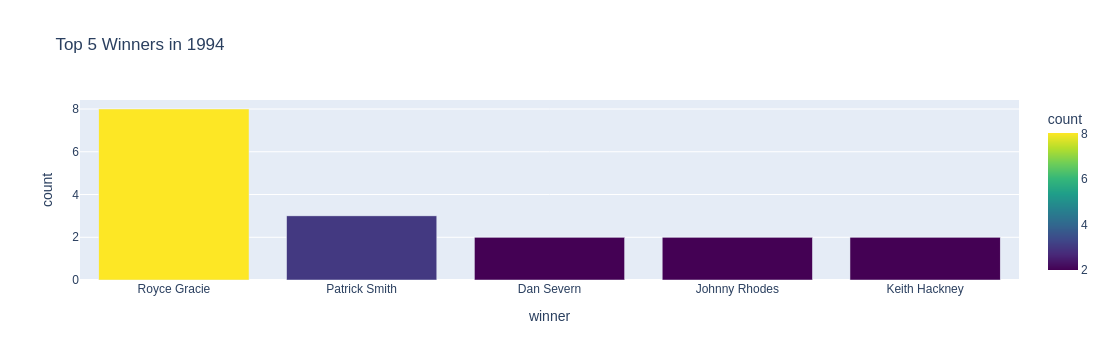

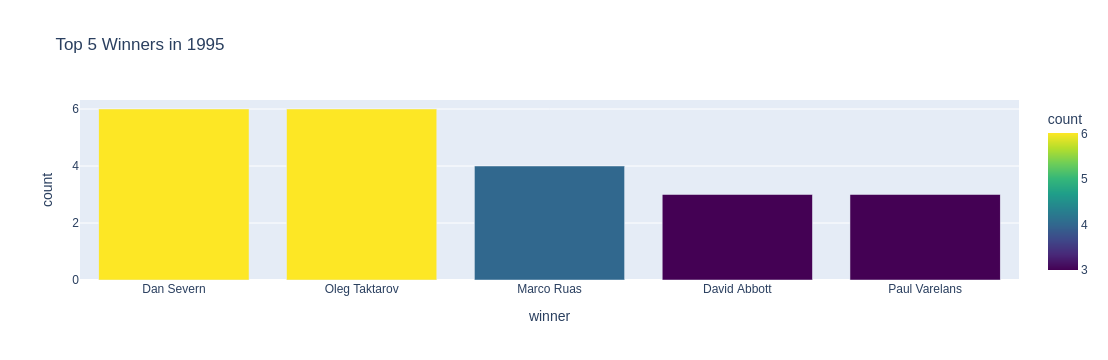

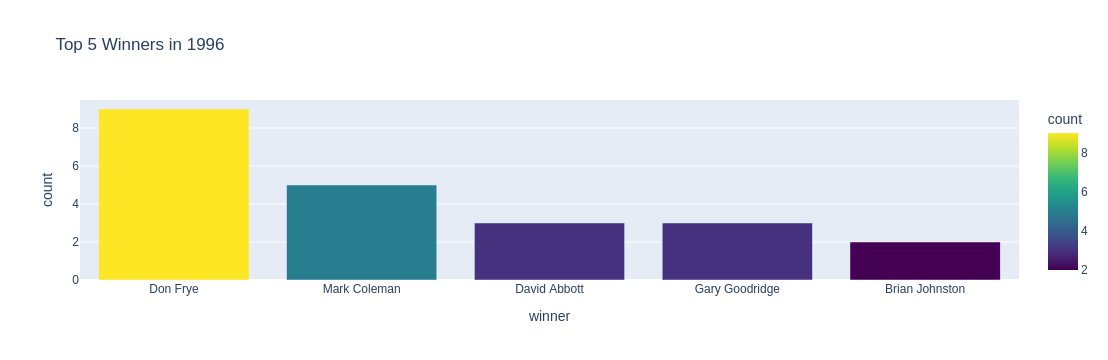

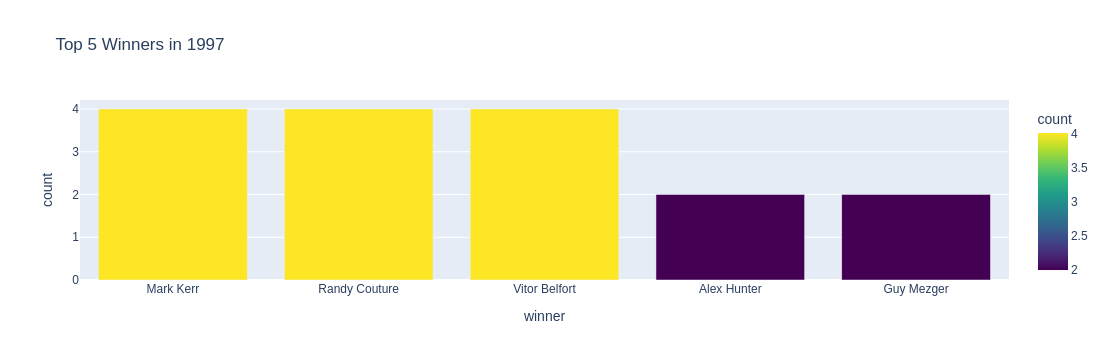

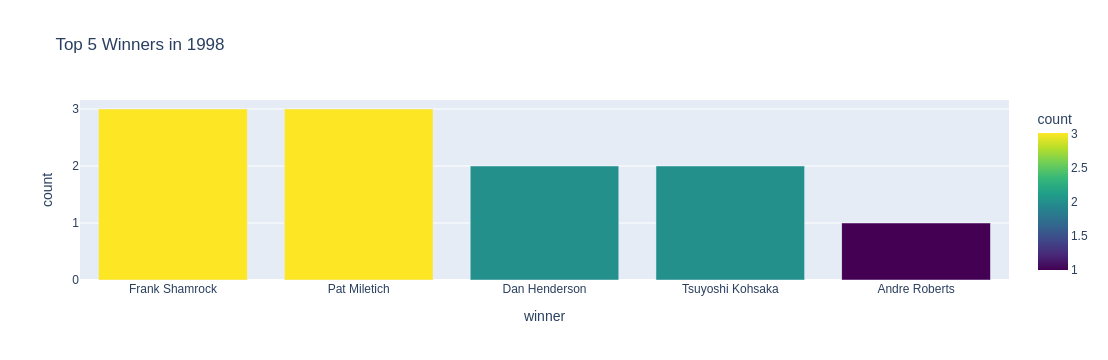

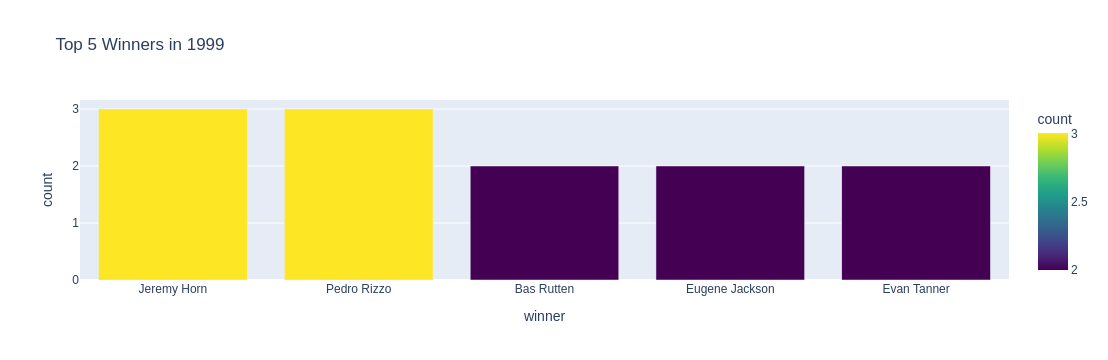

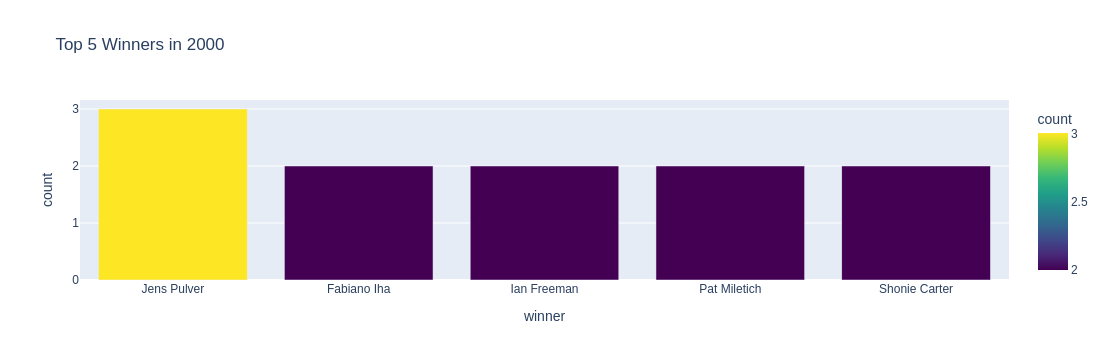

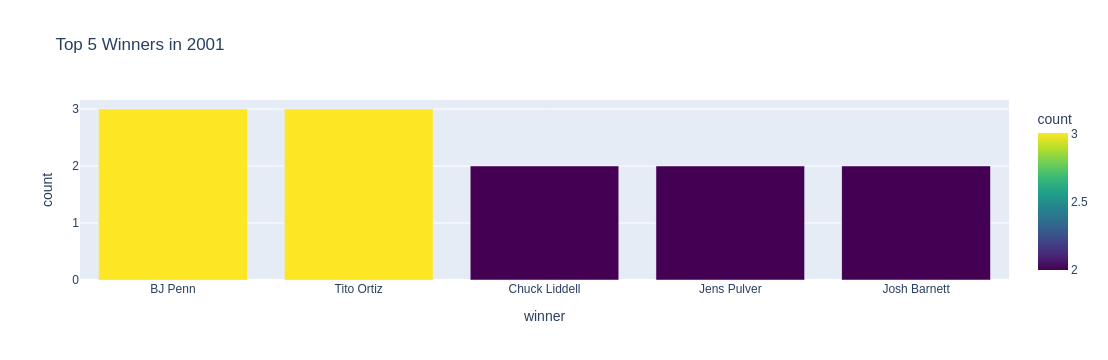

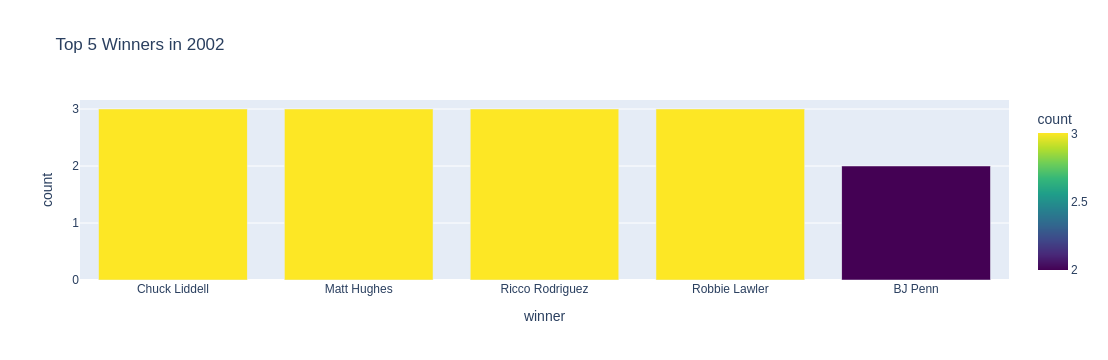

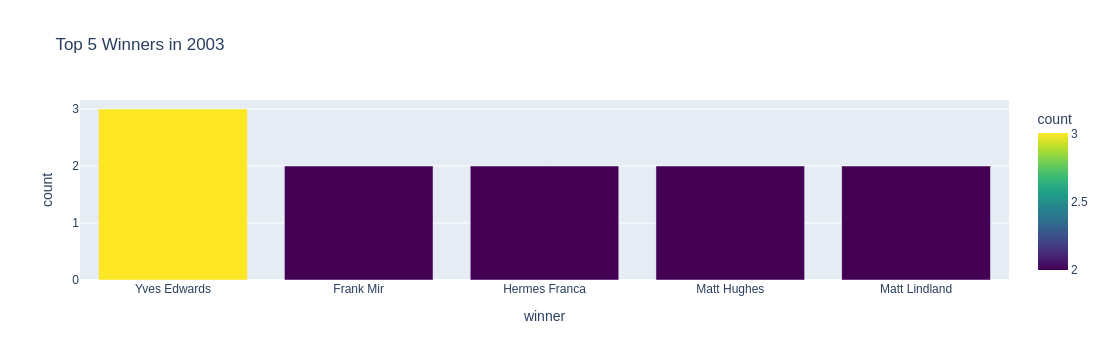

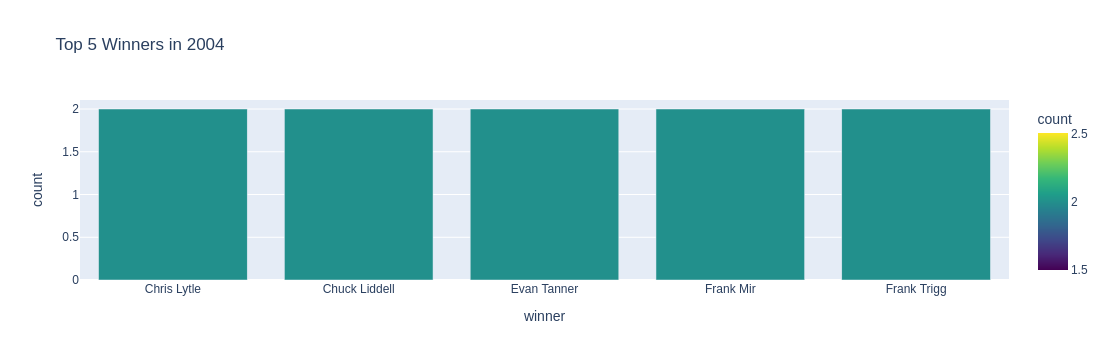

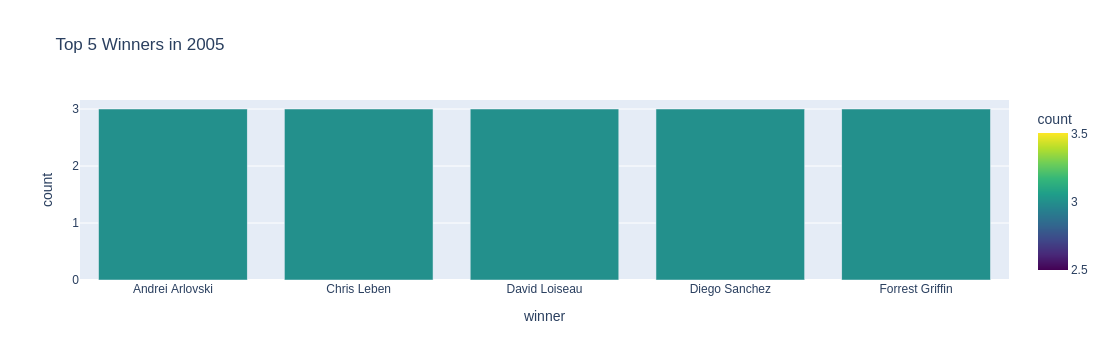

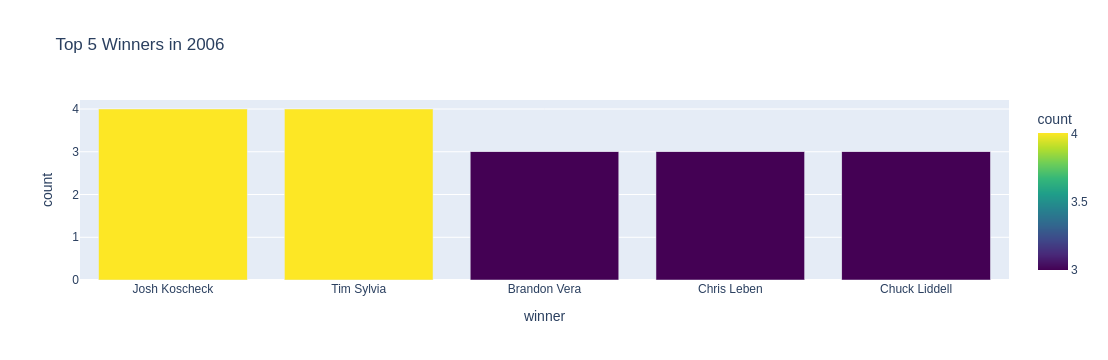

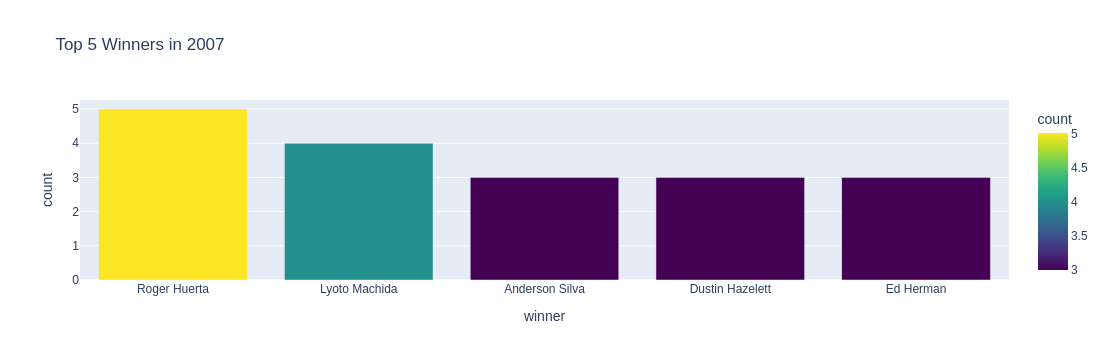

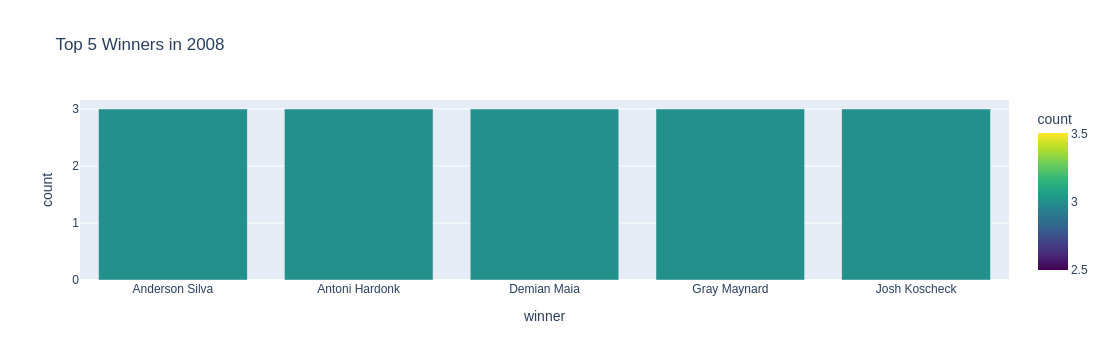

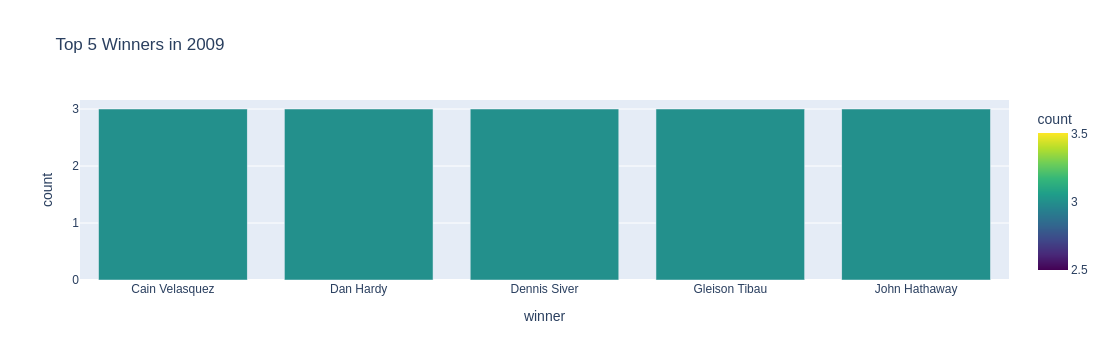

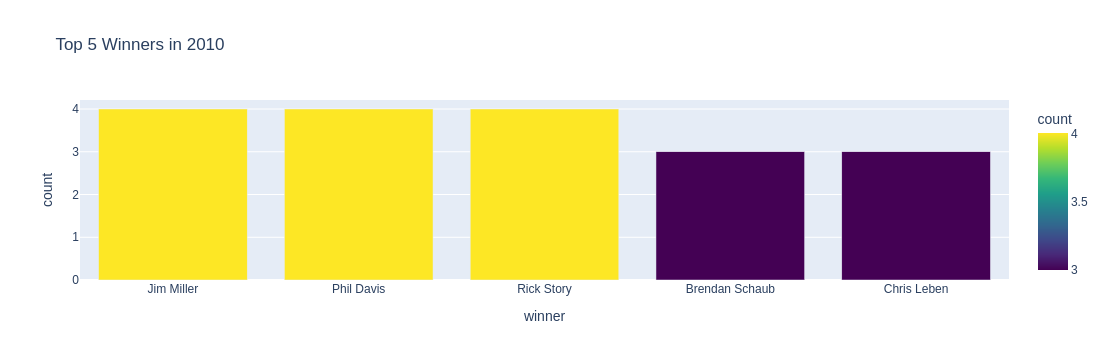

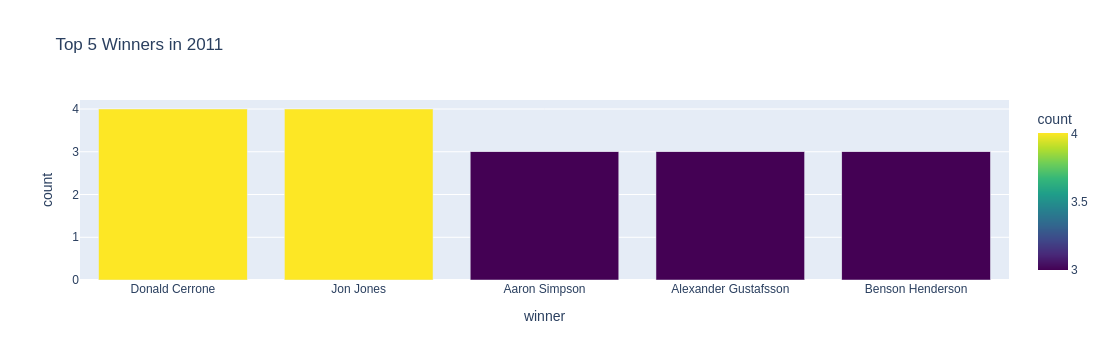

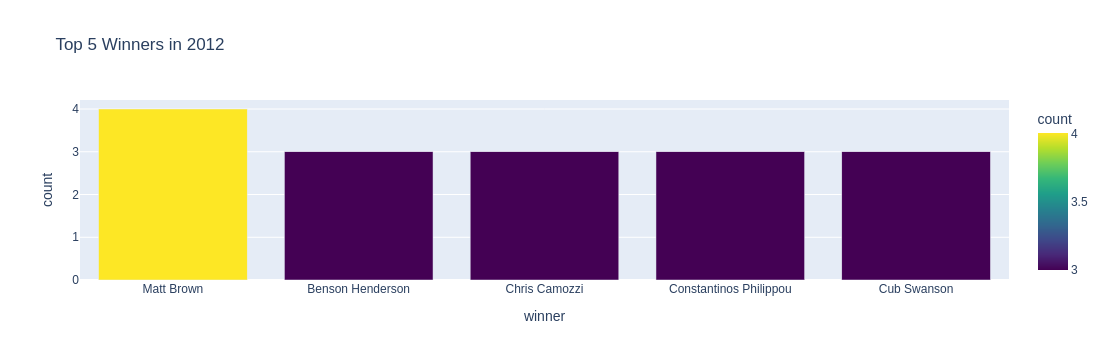

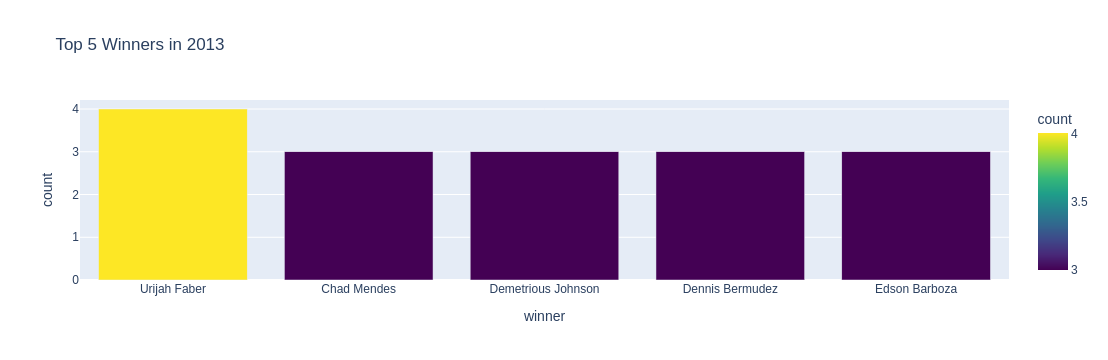

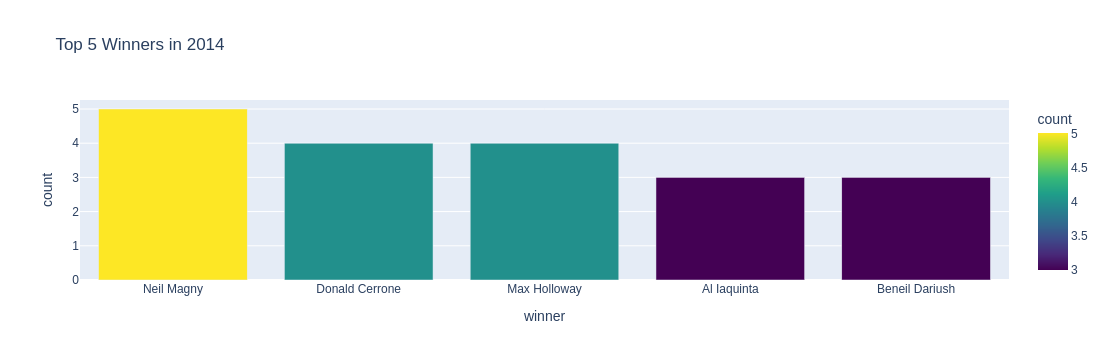

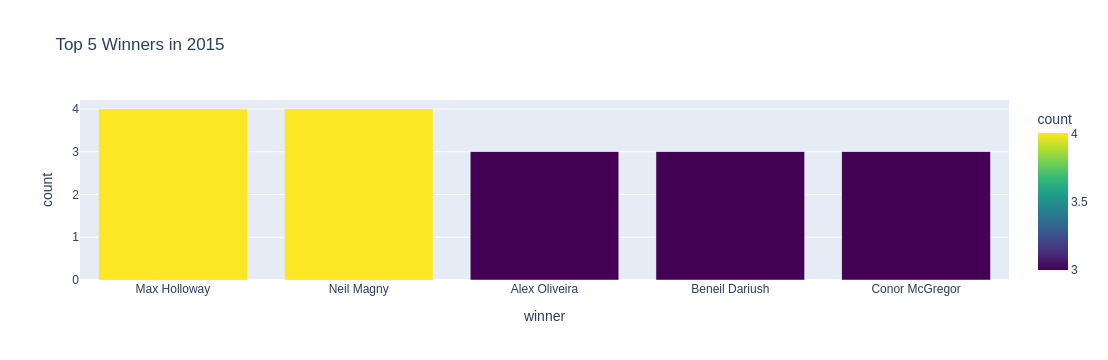

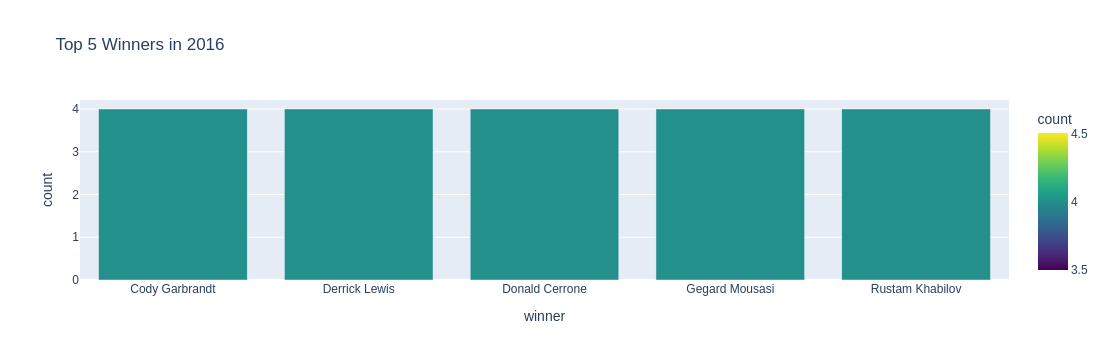

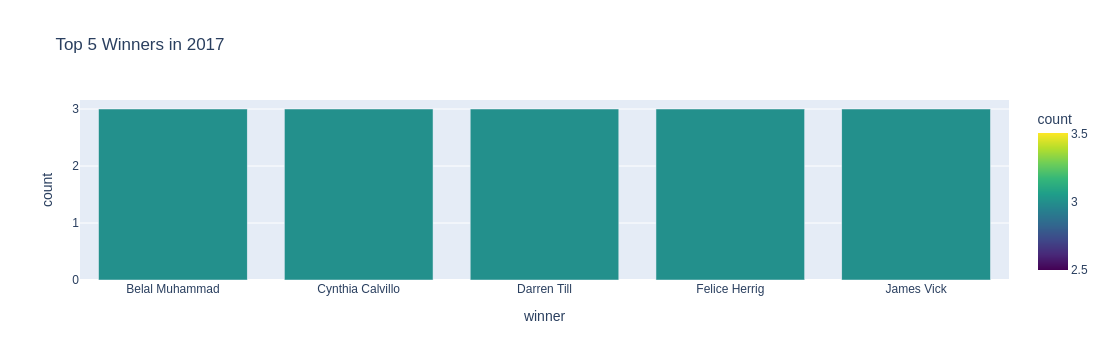

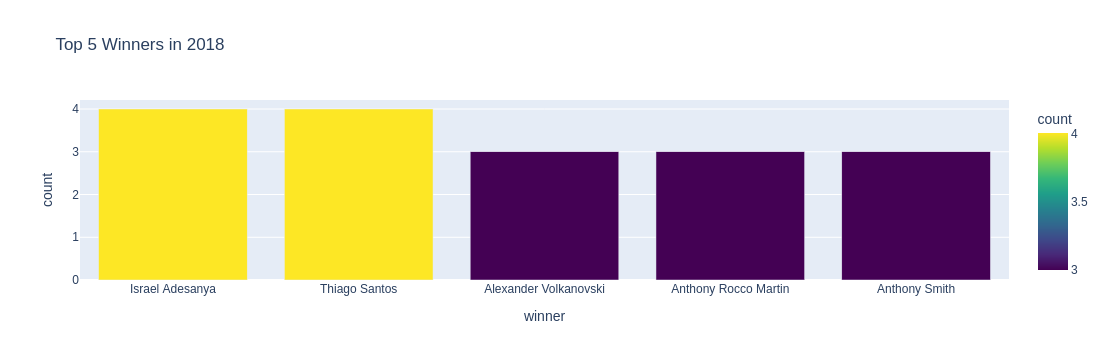

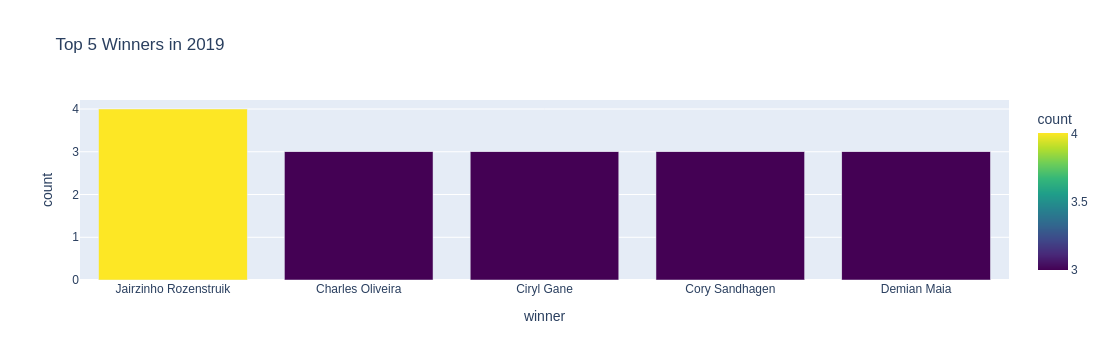

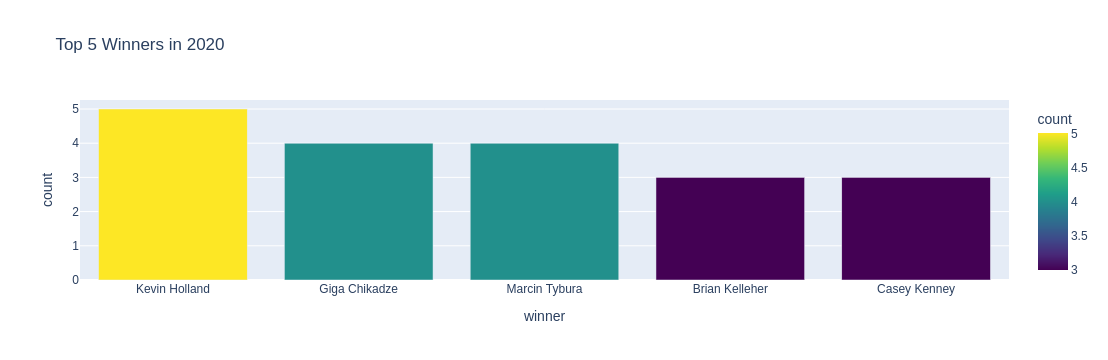

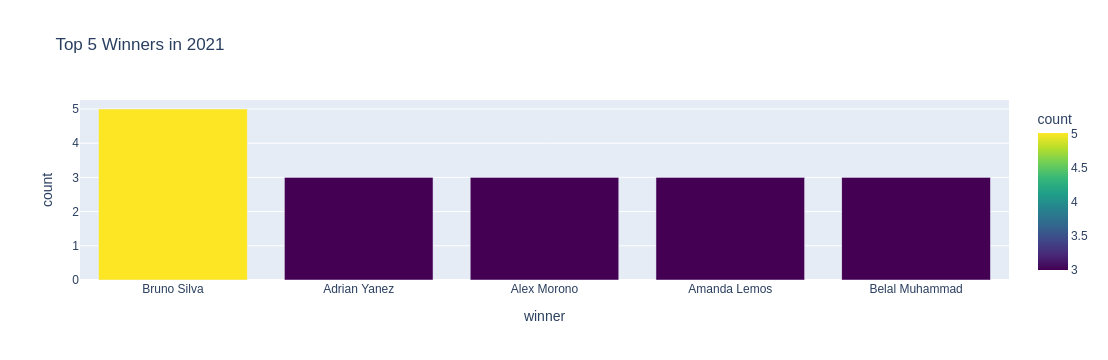

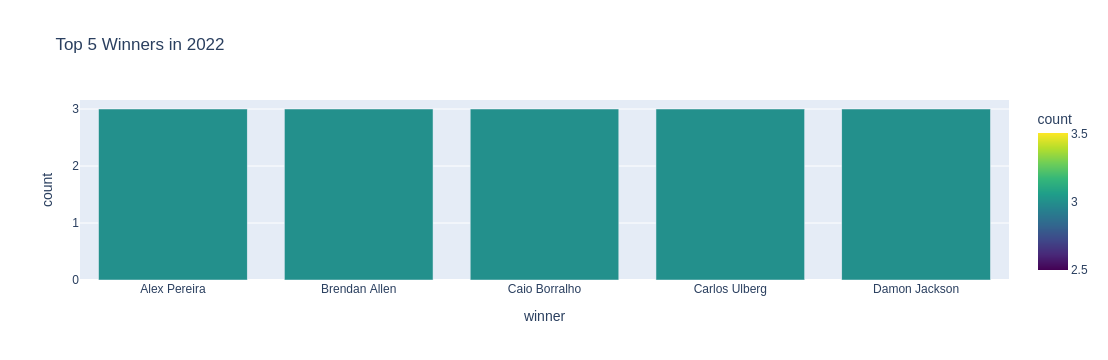

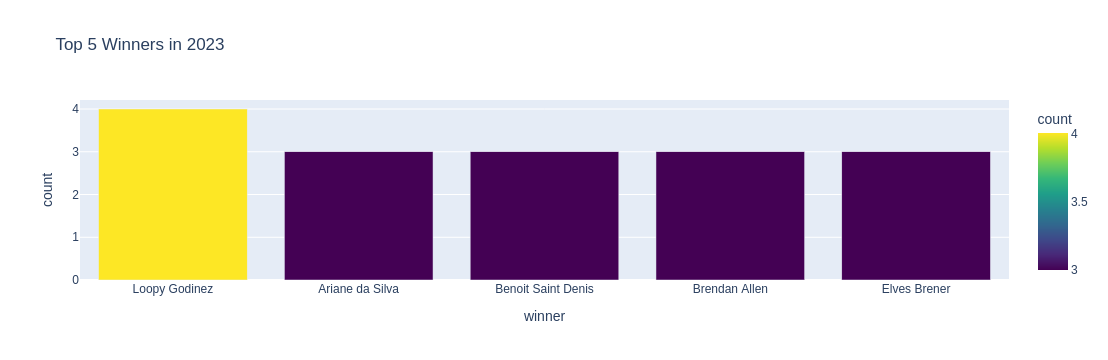

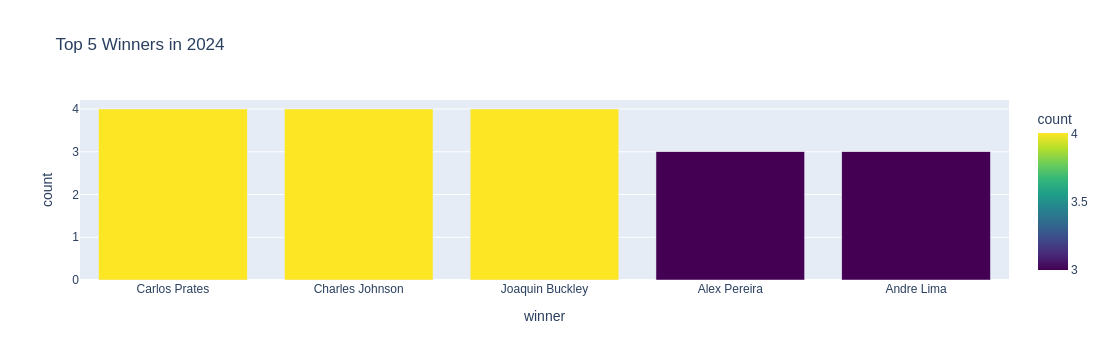

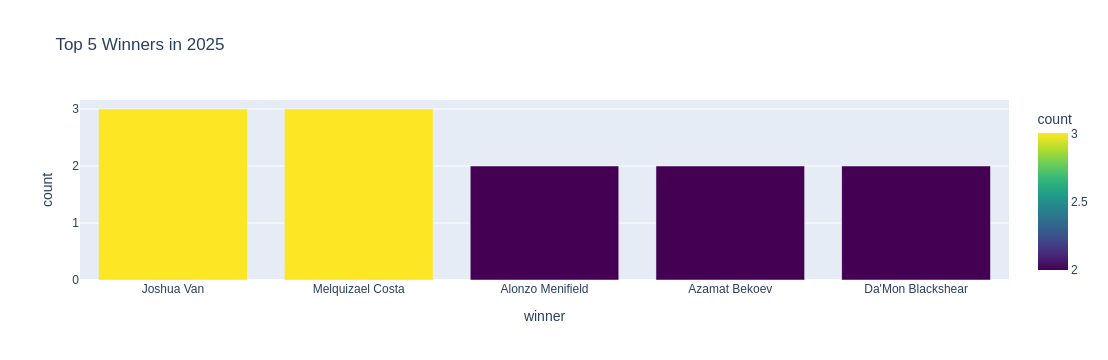

In [58]:
import plotly.express as px

for year in top_5_fighter_y_top5['year'].unique():
    year_data = top_5_fighter_y_top5[top_5_fighter_y_top5['year'] == year]

    fig = px.bar(
        year_data,
        x='winner',
        y='count',
        title=f'Top 5 Winners in {year}',
        color='count',
        color_continuous_scale='viridis'
    )

    fig.update_layout(showlegend=False)

    fig.show()


In [19]:
title_fight = df['title_fight'].value_counts()
title_fight

title_fight
0    7795
1     455
Name: count, dtype: int64

In [20]:
fig = px.bar(title_fight, title='Count of title_fight')
fig.show()

In [44]:
#Count of method:
method = df['method'].value_counts()
method

method
Decision - Unanimous       2955
KO/TKO                     2589
Submission                 1607
Decision - Split            794
TKO - Doctor's Stoppage      98
Decision - Majority          95
Overturned                   57
Could Not Continue           30
DQ                           23
Other                         2
Name: count, dtype: int64

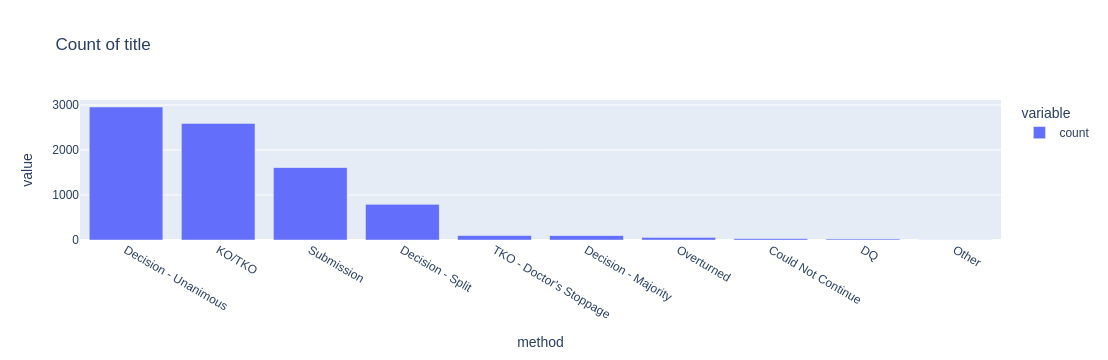

In [45]:
fig = px.bar(
    method,
    title='Count of title'
)
fig.show()

In [46]:
#Count of KO/KTO by years

ko = df[df['method'] == 'KO/TKO']

ko_years = ko.groupby(['year', 'method']).size().reset_index(name='ko_count')
ko_years

,year,method,ko_count
0,1994,KO/TKO,11
1,1995,KO/TKO,13
2,1996,KO/TKO,23
3,1997,KO/TKO,13
4,1998,KO/TKO,9
5,1999,KO/TKO,21
6,2000,KO/TKO,12
7,2001,KO/TKO,17
8,2002,KO/TKO,26
9,2003,KO/TKO,16


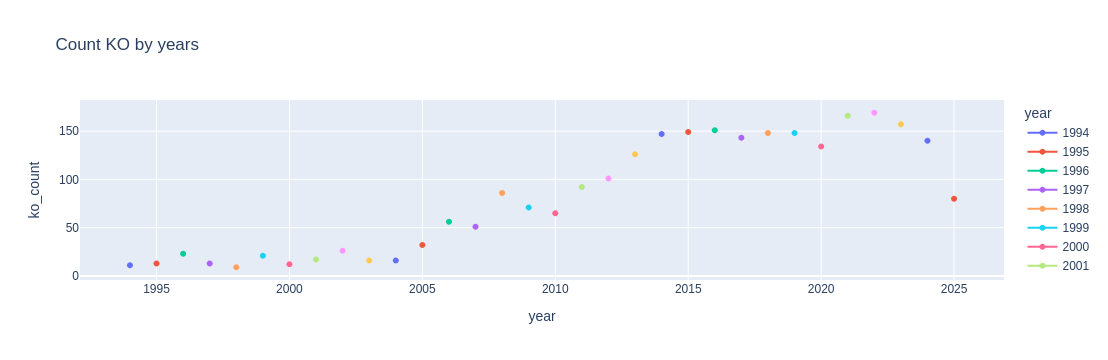

In [47]:
fig = px.line(
    ko_years,
    x='year',
    y='ko_count',
    color='year',
    title='Count KO by years',
    markers=True
)

fig.show()

In [48]:
#Find count of finish round

finish = df['finish_round'].value_counts()
finish

finish_round
3    4194
1    2324
2    1367
5     317
4      48
Name: count, dtype: int64

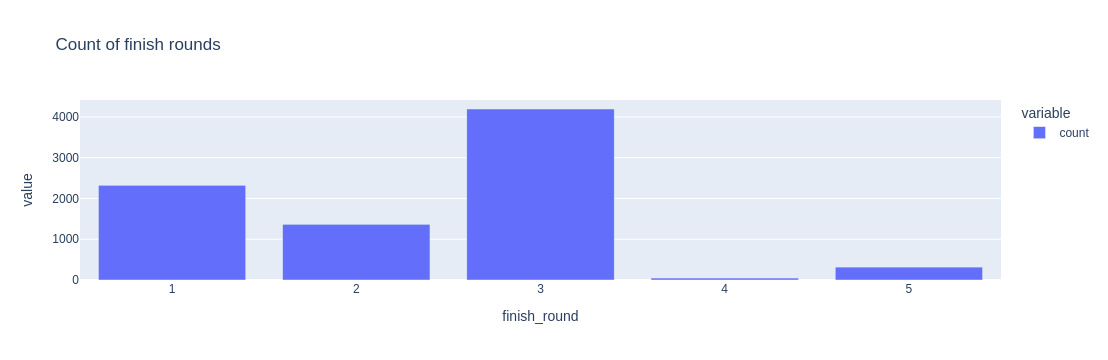

In [49]:
fig = px.bar(
    finish,
    title='Count of finish rounds'
)
fig.show()

In [50]:
df.columns

Index(['event_name', 'date', 'location', 'division', 'title_fight', 'method',
       'finish_round', 'match_time_sec', 'total_rounds', 'referee',
       ...
       'b_splm', 'b_str_acc', 'b_sapm', 'b_str_def', 'b_td_avg',
       'b_td_avg_acc', 'b_td_def', 'b_sub_avg', 'winner', 'year'],
      dtype='object', length=120)

In [52]:
#Total match time by years

match_time = df.groupby('year')['match_time_sec'].sum().reset_index(name='total_time')

match_time['total_time'] = match_time['total_time']


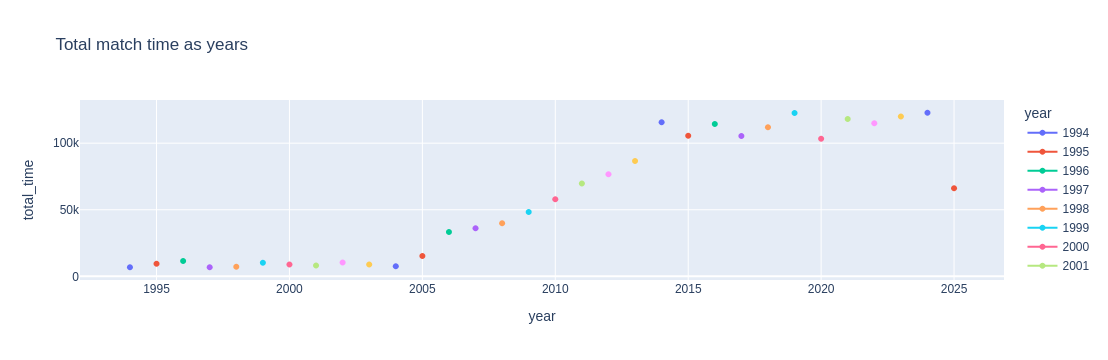

In [53]:
fig = px.line(
    match_time,
    x='year',
    y='total_time',
    color='year',
    title='Total match time as years',
    markers=True
)

fig.show()

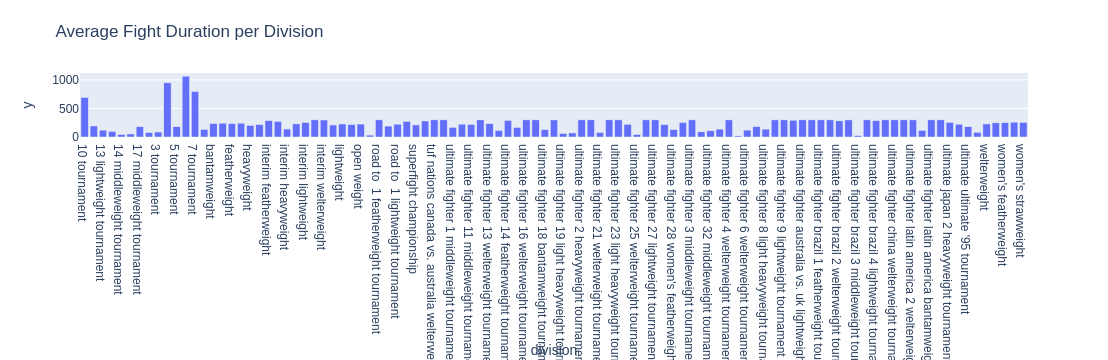

In [54]:
#Average Fight Duration per Division

avg_duration = df.groupby('division')['match_time_sec'].mean()
avg_duration_fig = px.bar(
                 avg_duration,
                 x=avg_duration.index,
                 y=avg_duration.values,
                 title="Average Fight Duration per Division"
                 )

avg_duration_fig.show()


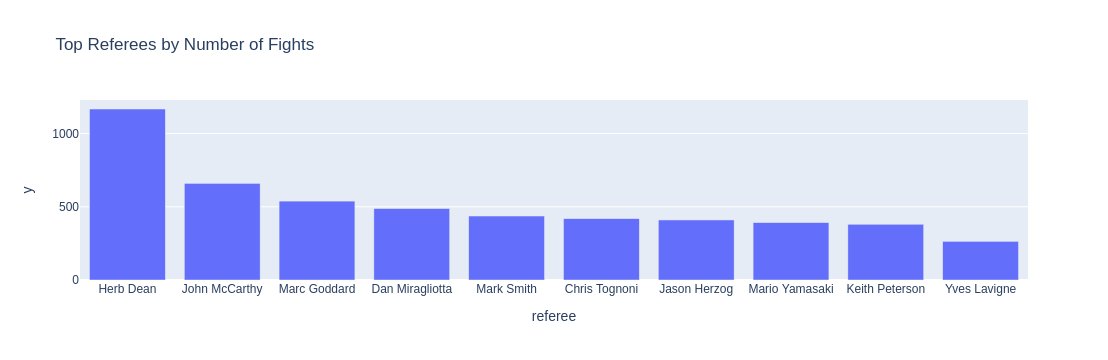

In [55]:
#Top Referees by Number of Fights


top_referees = df['referee'].value_counts().head(10)
top_referees_fig = px.bar(top_referees, x=top_referees.index, y=top_referees.values, title="Top Referees by Number of Fights")
top_referees_fig.show()


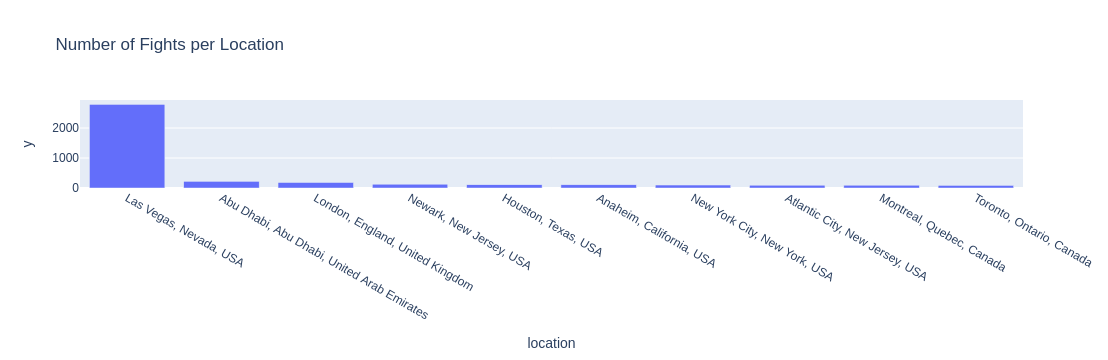

In [56]:
location_count = df['location'].value_counts().nlargest(10)
location_count_fig = px.bar(
                    location_count,
                    x=location_count.index,
                    y=location_count.values,
                    title="Number of Fights per Location")
location_count_fig.show()


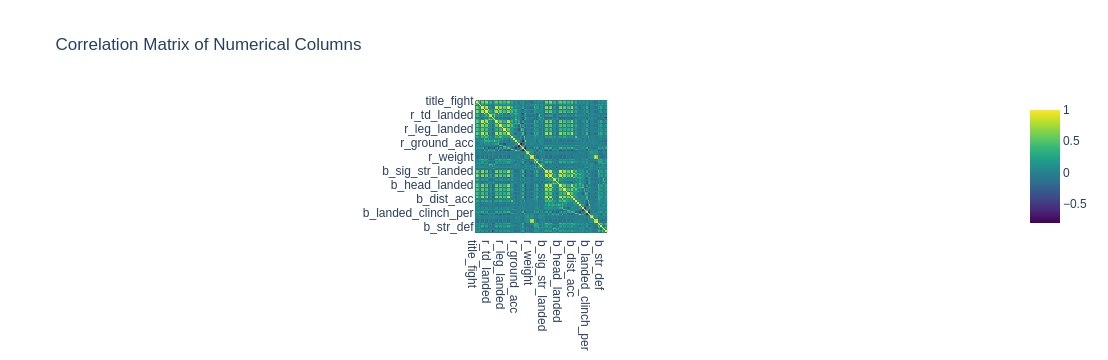

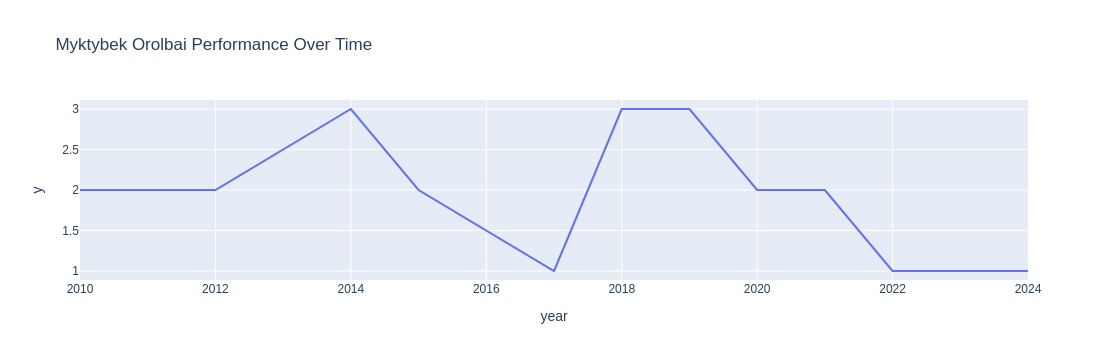

In [57]:
# Let's calculate the correlation matrix for the numerical columns in the dataset.
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_columns].corr()

# Visualize the correlation matrix using Plotly
import plotly.express as px

correlation_matrix_fig = px.imshow(correlation_matrix, color_continuous_scale="Viridis",
                                   title="Correlation Matrix of Numerical Columns")
correlation_matrix_fig.show()
#Fighter performance

fighter_performance = df[df['winner'] == 'Charles Oliveira'].groupby('year')['winner'].size()
fighter_performance_fig = px.line(fighter_performance, x=fighter_performance.index, y=fighter_performance.values, title="Myktybek Orolbai Performance Over Time")
fighter_performance_fig.show()


In [ ]:
#Fighter performance  2

fighter_performance = df[df['winner'] == 'Ilia Topuria'].groupby('year')['winner'].size()
fighter_performance
fighter_performance_fig = px.line(fighter_performance, x=fighter_performance.index, y=fighter_performance.values, title="Myktybek Orolbai Performance Over Time")
fighter_performance_fig.show()


In [ ]:
#Fighter performance  3

fighter_performance = df[df['winner'] == 'Rafael Fiziev'].groupby('year')['winner'].size()
fighter_performance
fighter_performance_fig = px.line(fighter_performance, x=fighter_performance.index, y=fighter_performance.values, title="Myktybek Orolbai Performance Over Time")
fighter_performance_fig.show()


In [ ]:
#Fighters with Most Submissions


submission_fighters = df[df['method'].str.contains('Submission')]['winner'].value_counts().head(10)
submission_fighters_fig = px.bar(submission_fighters, x=submission_fighters.index, y=submission_fighters.values, title="Fighters with Most Submissions")
submission_fighters_fig.show()


In [ ]:
#Number of Fights per Year

fights_per_year = df['year'].value_counts().sort_index()
fights_per_year_fig = px.line(fights_per_year, x=fights_per_year.index, y=fights_per_year.values, title="Number of Fights per Year")
fights_per_year_fig.show()


In [ ]:
#Average takedown per fighter

avg_td_fighter = df.groupby('winner')['b_td_avg'].mean().sort_values(ascending=False).head(10)
avg_td_fighter_fig = px.bar(avg_td_fighter, x=avg_td_fighter.index, y=avg_td_fighter.values, title="Average Takedown Average per Fighter")
avg_td_fighter_fig.show()


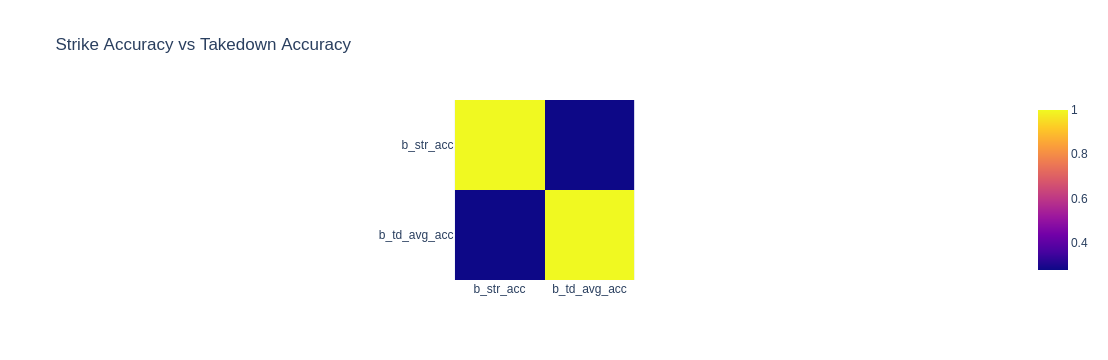

In [43]:
correlation_strikes_td = df[['b_str_acc', 'b_td_avg_acc']].corr()
correlation_strikes_td_fig = px.imshow(correlation_strikes_td, title="Strike Accuracy vs Takedown Accuracy")
correlation_strikes_td_fig.show()


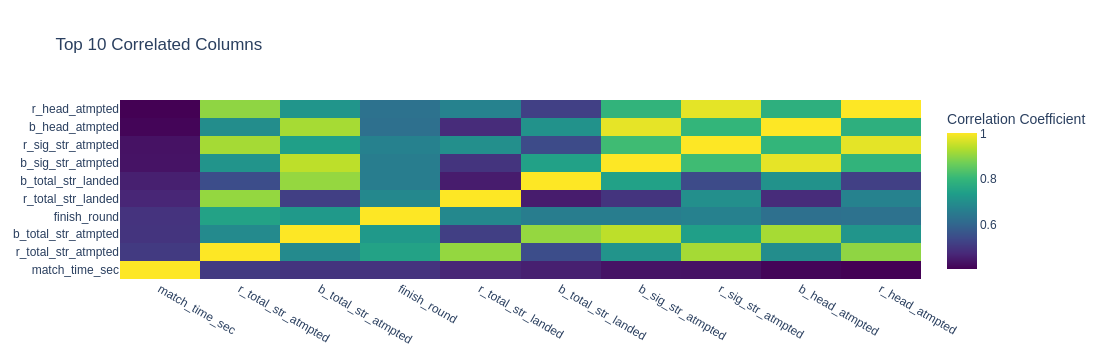

In [42]:
correlation_matrix = df[numerical_columns].corr()

top_10_correlated_columns = correlation_matrix.nlargest(10, 'match_time_sec').index

correlation_matrix_top10 = correlation_matrix.loc[top_10_correlated_columns, top_10_correlated_columns]


correlation_matrix_fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix_top10.values,
    x=correlation_matrix_top10.columns,
    y=correlation_matrix_top10.columns,
    colorscale='Viridis',
    colorbar=dict(title="Correlation Coefficient")
))

correlation_matrix_fig.update_layout(title="Top 10 Correlated Columns")
correlation_matrix_fig.show()
